In [118]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

### Loading training data

In [106]:
train_data = pd.read_csv("./kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Loading Test Data

In [107]:
test_data = pd.read_csv("./kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data Exploration

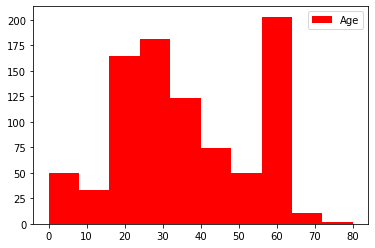

In [123]:
# Age
plt.hist(train_data['Age'], color="red", label="Age")
plt.legend()
plt.show()

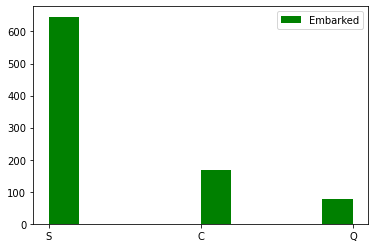

In [124]:
# Embarked
plt.hist(train_data['Embarked'].astype(str), color="green", label="Embarked")
plt.legend()
plt.show()

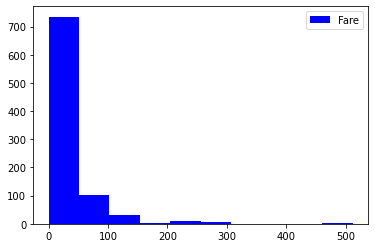

In [120]:
# Fare
plt.hist(train_data['Fare'].astype("int"), color="blue", label="Fare")
plt.legend()
plt.show()

#### Checking the survival rate of female passenger

In [112]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("female survival rate", rate_women)

female survival rate 0.7420382165605095


#### Checking the survival rate of male passenger

In [113]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("men survival rate:", rate_men)

men survival rate: 0.18890814558058924


##  Data Cleanup and Normalization

In [114]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [115]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [116]:
mean_age = (train_data["Age"]+test_data["Age"]).mean()
mean_fare = (train_data["Fare"]+test_data["Fare"]).mean()
train_data["Age"].fillna(mean_age, inplace=True)
test_data["Age"].fillna(mean_age, inplace=True)
train_data["Fare"].fillna(mean_fare, inplace=True)
test_data["Fare"].fillna(mean_fare, inplace=True)
train_data["Embarked"].fillna("S", inplace=True)
test_data["Embarked"].fillna("S", inplace=True)

In [117]:
train_data["Age"] = train_data["Age"].astype(int)
test_data["Age"] = test_data["Age"].astype(int)
train_data["Fare"] = train_data["Fare"].astype(int)
test_data["Fare"] = test_data["Fare"].astype(int)
train_data["Embarked"] = train_data["Embarked"].astype(str)
test_data["Embarked"] = test_data["Embarked"].astype(str)

## Using random forest classifier to get predictions.

In [22]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

#features = ["Pclass", "Sex", "SibSp", "Parch"]
#features = ["Pclass", "Sex", "SibSp", "Parch","Age"]
features = ["Pclass", "Sex", "SibSp", "Parch","Age","Embarked"]
#features = ["Pclass", "Sex", "SibSp", "Parch","Age","Embarked","Fare"]



X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
